In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [ ]:
df = pd.read_csv("Bee_population.csv")
df = df[['Year', 'State', 'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI','Value']]
df = df.pivot(index=['State', 'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI',], columns='Year', values='Value').reset_index()
df = df.rename_axis(None, axis=1)
df = df.replace(" (D)", np.NaN)

In [ ]:
df.head()

,State,State ANSI,Ag District,Ag District Code,County,County ANSI,2002,2007,2012,2017,2022
0,ALABAMA,1,BLACK BELT,40,AUTAUGA,1.0,212,201,119,137,258
1,ALABAMA,1,BLACK BELT,40,BULLOCK,11.0,NaN,NaN,NaN,NaN,48
2,ALABAMA,1,BLACK BELT,40,DALLAS,47.0,NaN,NaN,65,209,629
3,ALABAMA,1,BLACK BELT,40,ELMORE,51.0,NaN,31,190,151,305
4,ALABAMA,1,BLACK BELT,40,GREENE,63.0,NaN,NaN,14,31,40


In [ ]:
df.shape

(3015, 11)

In [ ]:
print(f'2002: {df[[2002]].isnull().sum()/df.shape[0]*100}')
print(f'2007: {df[[2007]].isnull().sum()/df.shape[0]*100}')
print(f'2012: {df[[2012]].isnull().sum()/df.shape[0]*100}')
print(f'2017: {df[[2017]].isnull().sum()/df.shape[0]*100}')
print(f'2022: {df[[2022]].isnull().sum()/df.shape[0]*100}')

2002: 2002    48.656716
dtype: float64
2007: 2007    37.645108
dtype: float64
2012: 2012    30.480929
dtype: float64
2017: 2017    20.729685
dtype: float64
2022: 2022    16.384743
dtype: float64


# Add Label

In [ ]:
# remove ',' in number
df[2002] = df[2002].str.replace(',', '')
df[2007] = df[2007].str.replace(',', '')
df[2012] = df[2012].str.replace(',', '')
df[2017] = df[2017].str.replace(',', '')
df[2022] = df[2022].str.replace(',', '')
# convert columns to int date type
df[2002] = df[2002].fillna(0).astype(str).astype(int)
df[2007] = df[2007].fillna(0).astype(str).astype(int)
df[2012] = df[2012].fillna(0).astype(str).astype(int)
df[2017] = df[2017].fillna(0).astype(str).astype(int)
df[2022] = df[2022].fillna(0).astype(str).astype(int)
# replace 0 back to nan
df[2002] = df[2002].replace(0, np.NaN)
df[2007] = df[2007].replace(0, np.NaN)
df[2012] = df[2012].replace(0, np.NaN)
df[2017] = df[2017].replace(0, np.NaN)
df[2022] = df[2022].replace(0, np.NaN)
# replace outliers to nan
df[2002] = df[2002].mask(df[2012].sub(df[2012].mean()).div(df[2012].std()).abs().gt(2))
df[2007] = df[2007].mask(df[2012].sub(df[2012].mean()).div(df[2012].std()).abs().gt(2))
df[2012] = df[2012].mask(df[2012].sub(df[2012].mean()).div(df[2012].std()).abs().gt(2))
df[2017] = df[2017].mask(df[2017].sub(df[2017].mean()).div(df[2017].std()).abs().gt(2))
df[2022] = df[2022].mask(df[2022].sub(df[2022].mean()).div(df[2022].std()).abs().gt(2))
# impute nan with mean
df[2002].fillna(value=round(df[2012].mean()), inplace=True)
df[2007].fillna(value=round(df[2012].mean()), inplace=True)
df[2012].fillna(value=round(df[2012].mean()), inplace=True)
df[2017].fillna(value=round(df[2017].mean()), inplace=True)
df[2022].fillna(value=round(df[2022].mean()), inplace=True)
df['2007_increase'] = df.apply(lambda x: 0 if (x[2007] - x[2002]) < 0 else 1, axis=1)
df['2012_increase'] = df.apply(lambda x: 0 if (x[2012] - x[2007]) < 0 else 1, axis=1)
df['2017_increase'] = df.apply(lambda x: 0 if (x[2017] - x[2012]) < 0 else 1, axis=1)
df['2022_increase'] = df.apply(lambda x: 0 if (x[2022] - x[2017]) < 0 else 1, axis=1)
df['County'] = df['County'].apply(lambda x: x.title()+' County')
df.head()

,State,State ANSI,Ag District,Ag District Code,County,County ANSI,2002,2007,2012,2017,2022,2007_increase,2012_increase,2017_increase,2022_increase
0,ALABAMA,1,BLACK BELT,40,Autauga County,1.0,212.0,201.0,119.0,137.0,258.0,0,0,1,1
1,ALABAMA,1,BLACK BELT,40,Bullock County,11.0,517.0,517.0,517.0,431.0,48.0,1,1,0,0
2,ALABAMA,1,BLACK BELT,40,Dallas County,47.0,517.0,517.0,65.0,209.0,629.0,1,0,1,1
3,ALABAMA,1,BLACK BELT,40,Elmore County,51.0,517.0,31.0,190.0,151.0,305.0,0,1,0,1
4,ALABAMA,1,BLACK BELT,40,Greene County,63.0,517.0,517.0,14.0,31.0,40.0,1,0,1,1


In [ ]:
df.shape

(3015, 15)

In [ ]:
states = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "IA",
          "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO",
          "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK",
          "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI",
          "WV", "WY"]
year = 2021
naics_value = 4
df_full = pd.DataFrame()
for state in states:
  url = f"https://raw.githubusercontent.com/ModelEarth/community-timelines/main/training/naics{naics_value}/US/counties/{year}/US-{state}-training-naics{naics_value}-counties-{year}.csv"
  df_ind = pd.read_csv(url)
  df_full = pd.concat([df_full, df_ind], axis=0, join='outer')

df_fips = df_full[['Name','Fips']].merge(df, how='outer', left_on='Name', right_on='County')
df_fips.head()

,Name,Fips,State,State ANSI,Ag District,Ag District Code,County,County ANSI,2002,2007,2012,2017,2022,2007_increase,2012_increase,2017_increase,2022_increase
0,Aleutians East Borough,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aleutians West Census Area,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anchorage Municipality,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bethel Census Area,2050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol Bay Borough,2060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_fips.tail()

,Name,Fips,State,State ANSI,Ag District,Ag District Code,County,County ANSI,2002,2007,2012,2017,2022,2007_increase,2012_increase,2017_increase,2022_increase
14591,NaN,NaN,VIRGINIA,51.0,SOUTHEASTERN,90.0,Isle Of Wight County,93.0,517.0,517.0,81.0,61.0,118.0,1.0,0.0,0.0,1.0
14592,NaN,NaN,VIRGINIA,51.0,SOUTHEASTERN,90.0,Suffolk City County,800.0,9.0,517.0,127.0,114.0,180.0,1.0,0.0,0.0,1.0
14593,NaN,NaN,VIRGINIA,51.0,SOUTHEASTERN,90.0,Virginia Beach City County,810.0,517.0,22.0,156.0,170.0,183.0,0.0,1.0,1.0,1.0
14594,NaN,NaN,WISCONSIN,55.0,EAST CENTRAL,60.0,Fond Du Lac County,39.0,257.0,163.0,188.0,236.0,135.0,0.0,1.0,1.0,0.0
14595,NaN,NaN,WISCONSIN,55.0,WEST CENTRAL,40.0,St Croix County,109.0,281.0,171.0,232.0,409.0,603.0,0.0,1.0,1.0,1.0


In [ ]:
df_fips.shape

(14596, 17)

In [ ]:
df_fips.to_csv('bee_population_with_label.csv')

In [ ]:
maine = df[df['State'] == 'MAINE']
maine = maine.reset_index(drop=True)
# remove ',' in number
maine[2002] = maine[2002].str.replace(',', '')
maine[2007] = maine[2007].str.replace(',', '')
maine[2012] = maine[2012].str.replace(',', '')
maine[2017] = maine[2017].str.replace(',', '')
maine[2022] = maine[2022].str.replace(',', '')
# convert columns to int date type
maine[2002] = maine[2002].fillna(0).astype(str).astype(int)
maine[2007] = maine[2007].fillna(0).astype(str).astype(int)
maine[2012] = maine[2012].fillna(0).astype(str).astype(int)
maine[2017] = maine[2017].fillna(0).astype(str).astype(int)
maine[2022] = maine[2022].fillna(0).astype(str).astype(int)
# replace 0 back to nan
maine[2002] = maine[2002].replace(0, np.NaN)
maine[2007] = maine[2007].replace(0, np.NaN)
maine[2012] = maine[2012].replace(0, np.NaN)
maine[2017] = maine[2017].replace(0, np.NaN)
maine[2022] = maine[2022].replace(0, np.NaN)
# replace outliers to nan
maine[2002] = maine[2002].mask(maine[2012].sub(maine[2012].mean()).div(maine[2012].std()).abs().gt(2))
maine[2007] = maine[2007].mask(maine[2012].sub(maine[2012].mean()).div(maine[2012].std()).abs().gt(2))
maine[2012] = maine[2012].mask(maine[2012].sub(maine[2012].mean()).div(maine[2012].std()).abs().gt(2))
maine[2017] = maine[2017].mask(maine[2017].sub(maine[2017].mean()).div(maine[2017].std()).abs().gt(2))
maine[2022] = maine[2022].mask(maine[2022].sub(maine[2022].mean()).div(maine[2022].std()).abs().gt(2))
# impute nan with mean
maine[2002].fillna(value=round(maine[2012].mean()), inplace=True)
maine[2007].fillna(value=round(maine[2012].mean()), inplace=True)
maine[2012].fillna(value=round(maine[2012].mean()), inplace=True)
maine[2017].fillna(value=round(maine[2017].mean()), inplace=True)
maine[2022].fillna(value=round(maine[2022].mean()), inplace=True)
maine

,State,State ANSI,Ag District,Ag District Code,County,County ANSI,2002,2007,2012,2017,2022
0,MAINE,23,CENTRAL,20,HANCOCK,9.0,59.0,80.0,30.0,133.0,197.0
1,MAINE,23,CENTRAL,20,PENOBSCOT,19.0,519.0,132.0,169.0,434.0,146.0
2,MAINE,23,CENTRAL,20,PISCATAQUIS,21.0,34.0,47.0,79.0,160.0,112.0
3,MAINE,23,CENTRAL,20,SOMERSET,25.0,119.0,65.0,282.0,517.0,89.0
4,MAINE,23,CENTRAL,20,WALDO,27.0,519.0,29.0,289.0,72.0,274.0
5,MAINE,23,CENTRAL,20,WASHINGTON,29.0,519.0,519.0,519.0,476.0,95.0
6,MAINE,23,NORTH,10,AROOSTOOK,3.0,109.0,115.0,171.0,83.0,89.0
7,MAINE,23,SOUTH,30,ANDROSCOGGIN,1.0,773.0,519.0,37.0,174.0,113.0
8,MAINE,23,SOUTH,30,CUMBERLAND,5.0,341.0,665.0,1770.0,247.0,146.0
9,MAINE,23,SOUTH,30,FRANKLIN,7.0,78.0,72.0,164.0,65.0,73.0


In [ ]:
maine['2007_increase'] = maine.apply(lambda x: 0 if (x[2007] - x[2002]) < 0 else 1, axis=1)
maine['2012_increase'] = maine.apply(lambda x: 0 if (x[2012] - x[2007]) < 0 else 1, axis=1)
maine['2017_increase'] = maine.apply(lambda x: 0 if (x[2017] - x[2012]) < 0 else 1, axis=1)
maine['2022_increase'] = maine.apply(lambda x: 0 if (x[2022] - x[2017]) < 0 else 1, axis=1)

In [ ]:
maine

,State,State ANSI,Ag District,Ag District Code,County,County ANSI,2002,2007,2012,2017,2022,2007_increase,2012_increase,2017_increase,2022_increase
0,MAINE,23,CENTRAL,20,HANCOCK,9.0,59.0,80.0,30.0,133.0,197.0,1,0,1,1
1,MAINE,23,CENTRAL,20,PENOBSCOT,19.0,519.0,132.0,169.0,434.0,146.0,0,1,1,0
2,MAINE,23,CENTRAL,20,PISCATAQUIS,21.0,34.0,47.0,79.0,160.0,112.0,1,1,1,0
3,MAINE,23,CENTRAL,20,SOMERSET,25.0,119.0,65.0,282.0,517.0,89.0,0,1,1,0
4,MAINE,23,CENTRAL,20,WALDO,27.0,519.0,29.0,289.0,72.0,274.0,0,1,0,1
5,MAINE,23,CENTRAL,20,WASHINGTON,29.0,519.0,519.0,519.0,476.0,95.0,1,1,0,0
6,MAINE,23,NORTH,10,AROOSTOOK,3.0,109.0,115.0,171.0,83.0,89.0,1,1,0,1
7,MAINE,23,SOUTH,30,ANDROSCOGGIN,1.0,773.0,519.0,37.0,174.0,113.0,0,0,1,0
8,MAINE,23,SOUTH,30,CUMBERLAND,5.0,341.0,665.0,1770.0,247.0,146.0,1,1,0,0
9,MAINE,23,SOUTH,30,FRANKLIN,7.0,78.0,72.0,164.0,65.0,73.0,0,1,0,1


# Visualization of Bee Population Change

In [ ]:
maine_plot = maine.iloc[:, -5:].dropna().reset_index(drop=True)
maine_plot

,2002,2007,2012,2017,2022
0,59,80,30,133,197
1,34,47,79,160,112
2,119,65,282,517,89
3,346,729,"7,032",476,95
4,109,115,171,83,89
5,341,665,"1,770","1,079",737
6,78,72,164,65,73
7,110,33,161,253,240


In [ ]:
maine_plot.dtypes

2002    object
2007    object
2012    object
2017    object
2022    object
dtype: object

In [ ]:
maine_plot[2002] = maine_plot[2002].str.replace(',', '')
maine_plot[2007] = maine_plot[2007].str.replace(',', '')
maine_plot[2012] = maine_plot[2012].str.replace(',', '')
maine_plot[2017] = maine_plot[2017].str.replace(',', '')
maine_plot[2022] = maine_plot[2022].str.replace(',', '')

maine_plot[2002] = maine_plot[2002].astype(str).astype(int)
maine_plot[2007] = maine_plot[2007].astype(str).astype(int)
maine_plot[2012] = maine_plot[2012].astype(str).astype(int)
maine_plot[2017] = maine_plot[2017].astype(str).astype(int)
maine_plot[2022] = maine_plot[2022].astype(str).astype(int)

In [ ]:
maine_plot

,2002,2007,2012,2017,2022
0,59,80,30,133,197
1,34,47,79,160,112
2,119,65,282,517,89
3,346,729,7032,476,95
4,109,115,171,83,89
5,341,665,1770,1079,737
6,78,72,164,65,73
7,110,33,161,253,240


<Axes: >

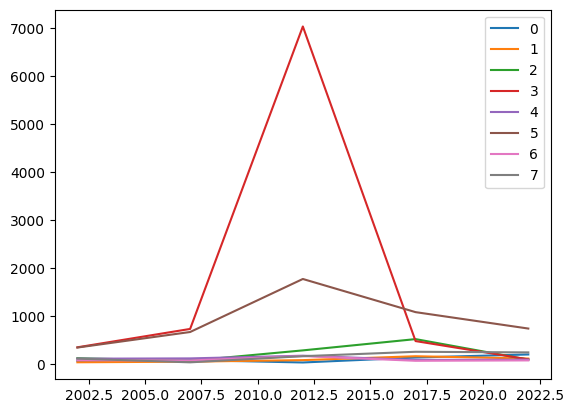

In [ ]:
maine_plot.T.plot.line()

<Axes: >

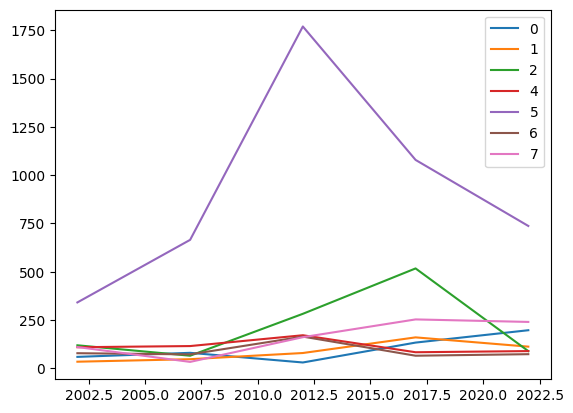

In [ ]:
maine_plot.drop(3).T.plot.line()

<Axes: >

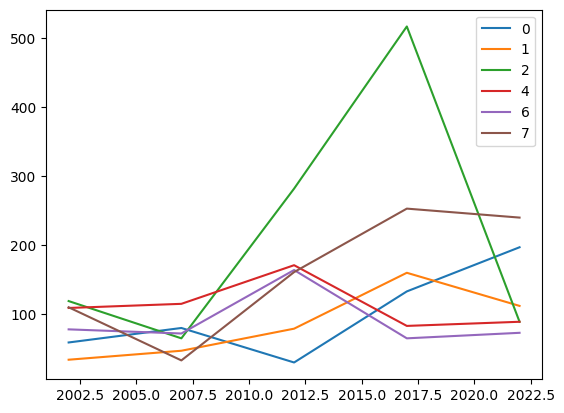

In [ ]:
maine_plot.drop([3,5]).T.plot.line()

# Merge data 2017

In [ ]:
df = pd.read_csv("Bee_population.csv")
df = df[['Year', 'State', 'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI','Value']]
df = df.replace(" (D)", np.NaN)
df['Value'] = df['Value'].str.replace(',', '')
df_2017 = df[df['Year']== 2017]
df_2017_me = df_2017[df_2017['State'] == 'MAINE']
df_2017_me = df_2017_me.reset_index(drop=True)
df_2017_me = df_2017_me.merge(maine[['County','2017_decrease']], on='County')
df_2017_me['County'] = df_2017_me['County'].apply(lambda x: x.title()+' County')
df_2017_me.head()

,Year,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Value,2017_decrease
0,2017,MAINE,23,CENTRAL,20,Hancock County,9.0,133,0
1,2017,MAINE,23,CENTRAL,20,Penobscot County,19.0,434,0
2,2017,MAINE,23,CENTRAL,20,Piscataquis County,21.0,160,0
3,2017,MAINE,23,CENTRAL,20,Somerset County,25.0,517,0
4,2017,MAINE,23,CENTRAL,20,Waldo County,27.0,72,1


In [ ]:
year = 2017
state = 'ME'
naics_value = 4
url = f"https://raw.githubusercontent.com/ModelEarth/community-timelines/main/training/naics{naics_value}/US/counties/{year}/US-{state}-training-naics{naics_value}-counties-{year}.csv"
df_ind = pd.read_csv(url)

In [ ]:
df_ind.head()

,Fips,Name,Population,Longitude,Latitude,Km2,UrbanDensity,UrbanPercent,Emp-1131,Est-1131,...,Pay-8132,Emp-8133,Est-8133,Pay-8133,Emp-8134,Est-8134,Pay-8134,Emp-8139,Est-8139,Pay-8139
0,23001,Androscoggin County,107,-70.20,44.14,1287.45,0.08,0.67,NaN,NaN,...,NaN,46.0,6.0,1260.0,164.0,25.0,2562.0,17.0,10.0,946.0
1,23003,Aroostook County,69,-68.47,46.68,17681.23,0.00,0.01,NaN,NaN,...,229.0,26.0,3.0,970.0,26.0,10.0,330.0,74.0,11.0,1477.0
2,23005,Cumberland County,289,-77.28,40.15,2465.98,0.12,0.46,NaN,NaN,...,17203.0,465.0,66.0,25372.0,416.0,58.0,8695.0,457.0,77.0,18354.0
3,23007,Franklin County,30,-95.22,33.20,4514.24,0.01,0.08,NaN,NaN,...,NaN,49.0,6.0,1450.0,19.0,4.0,188.0,11.0,6.0,351.0
4,23009,Hancock County,54,-91.15,40.39,4543.05,0.01,0.13,NaN,NaN,...,3329.0,62.0,13.0,2916.0,58.0,10.0,1118.0,70.0,22.0,1685.0


In [ ]:
df_full_2017 = df_ind.merge(df_2017_me[['County','Value','2017_decrease']], how='left', left_on='Name', right_on='County')
df_full_2017 = df_full_2017.drop('County', axis=1)
df_full_2017.head()

,Fips,Name,Population,Longitude,Latitude,Km2,UrbanDensity,UrbanPercent,Emp-1131,Est-1131,...,Est-8133,Pay-8133,Emp-8134,Est-8134,Pay-8134,Emp-8139,Est-8139,Pay-8139,Value,2017_decrease
0,23001,Androscoggin County,107,-70.20,44.14,1287.45,0.08,0.67,NaN,NaN,...,6.0,1260.0,164.0,25.0,2562.0,17.0,10.0,946.0,174,0
1,23003,Aroostook County,69,-68.47,46.68,17681.23,0.00,0.01,NaN,NaN,...,3.0,970.0,26.0,10.0,330.0,74.0,11.0,1477.0,83,1
2,23005,Cumberland County,289,-77.28,40.15,2465.98,0.12,0.46,NaN,NaN,...,66.0,25372.0,416.0,58.0,8695.0,457.0,77.0,18354.0,1079,1
3,23007,Franklin County,30,-95.22,33.20,4514.24,0.01,0.08,NaN,NaN,...,6.0,1450.0,19.0,4.0,188.0,11.0,6.0,351.0,65,1
4,23009,Hancock County,54,-91.15,40.39,4543.05,0.01,0.13,NaN,NaN,...,13.0,2916.0,58.0,10.0,1118.0,70.0,22.0,1685.0,133,0


In [ ]:
df_full_2017 = df_full_2017.rename(columns={'2017_decrease': 'label'})

In [ ]:
df_full_2017[['2017_decrease']].isnull().sum()/df.shape[0]*100

2017_decrease    0.0
dtype: float64

In [ ]:
df_full_2017.shape

(16, 676)

# Data Merge 2022

In [ ]:
df_2022 = df[df['Year']== 2022]
df_2022_me = df_2022[df_2022['State'] == 'MAINE']
df_2022_me = df_2022_me.reset_index(drop=True)
df_2022_me = df_2022_me.merge(maine[['County','2022_decrease']], on='County')
df_2022_me['County'] = df_2022_me['County'].apply(lambda x: x.title()+' County')

year = 2021
state = 'ME'
naics_value = 4
url = f"https://raw.githubusercontent.com/ModelEarth/community-timelines/main/training/naics{naics_value}/US/counties/{year}/US-{state}-training-naics{naics_value}-counties-{year}.csv"
df_ind = pd.read_csv(url)

df_full_2022 = df_ind.merge(df_2022_me[['County','Value','2022_decrease']], how='left', left_on='Name', right_on='County')
df_full_2022 = df_full_2022.drop('County', axis=1)
df_full_2022.head()

,Fips,Name,Population,Longitude,Latitude,Km2,UrbanDensity,UrbanPercent,Emp-1131,Est-1131,...,Est-8133,Pay-8133,Emp-8134,Est-8134,Pay-8134,Emp-8139,Est-8139,Pay-8139,Value,2022_decrease
0,23001,Androscoggin County,110,-70.20,44.14,1287.41,0.09,0.43,NaN,NaN,...,9.0,1678.0,155.0,24.0,2647.0,21.0,8.0,1296.0,113,1
1,23003,Aroostook County,67,-68.47,46.68,17681.39,0.00,0.01,NaN,NaN,...,3.0,901.0,22.0,8.0,270.0,76.0,11.0,1648.0,89,0
2,23005,Cumberland County,301,-77.28,40.15,2464.30,0.12,0.39,NaN,NaN,...,68.0,29132.0,345.0,64.0,11040.0,426.0,84.0,20425.0,737,1
3,23007,Franklin County,29,-95.22,33.20,4514.22,0.01,0.01,NaN,NaN,...,8.0,1137.0,12.0,4.0,142.0,8.0,5.0,229.0,73,0
4,23009,Hancock County,55,-91.15,40.39,4541.51,0.01,0.16,NaN,NaN,...,15.0,3728.0,49.0,9.0,1327.0,52.0,18.0,1502.0,197,0


In [ ]:
df_full_2022 = df_full_2022.rename(columns={'2022_decrease': 'label'})

In [ ]:
df_full_2022.shape

(16, 679)

In [ ]:
df_full = pd.concat([df_full_2017, df_full_2022], axis=0, join='inner')
df_full.head()

,Fips,Name,Population,Longitude,Latitude,Km2,UrbanDensity,UrbanPercent,Emp-1131,Est-1131,...,Est-8133,Pay-8133,Emp-8134,Est-8134,Pay-8134,Emp-8139,Est-8139,Pay-8139,Value,label
0,23001,Androscoggin County,107,-70.20,44.14,1287.45,0.08,0.67,NaN,NaN,...,6.0,1260.0,164.0,25.0,2562.0,17.0,10.0,946.0,174,0
1,23003,Aroostook County,69,-68.47,46.68,17681.23,0.00,0.01,NaN,NaN,...,3.0,970.0,26.0,10.0,330.0,74.0,11.0,1477.0,83,1
2,23005,Cumberland County,289,-77.28,40.15,2465.98,0.12,0.46,NaN,NaN,...,66.0,25372.0,416.0,58.0,8695.0,457.0,77.0,18354.0,1079,1
3,23007,Franklin County,30,-95.22,33.20,4514.24,0.01,0.08,NaN,NaN,...,6.0,1450.0,19.0,4.0,188.0,11.0,6.0,351.0,65,1
4,23009,Hancock County,54,-91.15,40.39,4543.05,0.01,0.13,NaN,NaN,...,13.0,2916.0,58.0,10.0,1118.0,70.0,22.0,1685.0,133,0


In [ ]:
df_full.shape

(32, 655)

In [ ]:
df_full_model = df_full.loc[:, df_full.isnull().mean() < .5]
df_full_model.shape

(32, 328)

In [ ]:
df_full_model.head()

,Fips,Name,Population,Longitude,Latitude,Km2,UrbanDensity,UrbanPercent,Emp-1133,Est-1133,...,Est-8133,Pay-8133,Emp-8134,Est-8134,Pay-8134,Emp-8139,Est-8139,Pay-8139,Value,label
0,23001,Androscoggin County,107,-70.20,44.14,1287.45,0.08,0.67,37.0,9.0,...,6.0,1260.0,164.0,25.0,2562.0,17.0,10.0,946.0,174,0
1,23003,Aroostook County,69,-68.47,46.68,17681.23,0.00,0.01,528.0,131.0,...,3.0,970.0,26.0,10.0,330.0,74.0,11.0,1477.0,83,1
2,23005,Cumberland County,289,-77.28,40.15,2465.98,0.12,0.46,25.0,12.0,...,66.0,25372.0,416.0,58.0,8695.0,457.0,77.0,18354.0,1079,1
3,23007,Franklin County,30,-95.22,33.20,4514.24,0.01,0.08,155.0,20.0,...,6.0,1450.0,19.0,4.0,188.0,11.0,6.0,351.0,65,1
4,23009,Hancock County,54,-91.15,40.39,4543.05,0.01,0.13,30.0,8.0,...,13.0,2916.0,58.0,10.0,1118.0,70.0,22.0,1685.0,133,0


In [ ]:
df_full_model = df_full_model.fillna(df_full_model.median())

<ipython-input-63-f61ebbe12634>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_full_model = df_full_model.fillna(df_full_model.median())


# Build Tree Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
df_full_model.label.value_counts()

1    17
0    15
Name: label, dtype: int64

In [ ]:
X = df_full_model.drop(columns=['Fips','Name','label','Longitude','Latitude'])
y = df_full_model['label']

In [ ]:
X.shape

(32, 323)

In [ ]:
y.shape

(32,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rfc=RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth' : [5, 10, 20, 50, 80]
}
rfcs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfcs.fit(X_train, y_train)
#save optimal parameters
n_estimator = rfcs.best_params_['n_estimators']
depth = rfcs.best_params_['max_depth']
print(f'n_estimators = {n_estimator} and max_depth = {depth}')

n_estimators = 150 and max_depth = 5


In [ ]:
#fit a new random forest with optimal parameters
opt_rfc = RandomForestClassifier(n_estimators= n_estimator, max_depth=depth)
opt_rfc.fit(X_train, y_train)
pred_train = opt_rfc.predict(X_train)
pred_test = opt_rfc.predict(X_test)

accu_train = accuracy_score(y_train, pred_train)
accu_test = accuracy_score(y_test, pred_test)

f1_train = f1_score(y_train, pred_train)
f1_test = f1_score(y_test, pred_test)

recall_train = recall_score(y_train, pred_train)
recall_test = recall_score(y_test, pred_test)

precision_train = precision_score(y_train, pred_train)
precision_test = precision_score(y_test, pred_test)
print(f'Accuracy score on train set = {accu_train} and accuracy score on test set = {accu_test}')
print(f'f1 score on train set = {f1_train} and f1 score on test set = {f1_test}')
print(f'Recall score on train set = {recall_train} and recall score on test set = {recall_test}')
print(f'Precision score on train set = {precision_train} and precision score on test set = {precision_test}')

Accuracy score on train set = 1.0 and accuracy score on test set = 0.42857142857142855
f1 score on train set = 1.0 and f1 score on test set = 0.5
Recall score on train set = 1.0 and recall score on test set = 0.5
Precision score on train set = 1.0 and precision score on test set = 0.5
